### `Experiment: 02`

> for each data directory `[]`:

#### *Data Loading and Augmentation*
> Keeps separate <span style="color: red">20%</span> per class test data, chosen <span style="color: red">randomly</span> with train_test_split which is unseen for both the pretext and the validation task

> augment data for the pretext task with  <span style="color: red">4 labels: [0->0, 90->1, 180->2, 270->3]</span> 

#### *Pretext Task*

> for each architecture in <span style="color: red">['cnn', 'resnet50', 'resnet101', 'resnet152', 'efficientnetb0', 'vgg16', 'vgg19', 'inceptionv3', 'unet']</span> 
>
> trains the data on the defined pretext models with the following configurations:
>   - build_custom_cnn_model
>       - <span style="color: red"> input_shape=(128, 128, 1)</span><br/>
>       - <span style="color: red"> num_classes=4</span><br/>
>       - architecture_name=architecture_name<br/>
>       - <span style="color: red"> fine_tune=True</span><br/>
>
>
> ### CNN
> - input shape: (<span style="color: red">128</span>, <span style="color: red">128</span>, 1)
> - Conv1: 
>     - Conv2D(<span style="color: red">32</span>, <span style="color: red">(3, 3)</span>)
>     - BatchNormalization
>     - MaxPooling2D(<span style="color: red">(2, 2)</span>)
> - Conv2: 
>     - Conv2D(<span style="color: red">64</span>, <span style="color: red">(3, 3)</span>)
>     - BatchNormalization
>     - MaxPooling2D(<span style="color: red">(2, 2)</span>)
> - Conv3: 
>     - Conv2D(<span style="color: red">128</span>, <span style="color: red">(3, 3)</span>)
>     - BatchNormalization
>     - MaxPooling2D(<span style="color: red">(2, 2)</span>)
> - Conv4: 
>     - Conv2D(<span style="color: red">256</span>, <span style="color: red">(3, 3)</span>)
>     - BatchNormalization
>     - GlobalAveragePooling2D()
> - Dense(<span style="color: red">512</span>, activation=<span style="color: red">'relu'</span>)
> - Dropout(<span style="color: red">0.5</span>)
> - output: Dense(num_classes=4, activation=<span style="color: red">'softmax'</span>)
> - Training Configuration:
>     - optimizer=tf.keras.optimizers.Adam(learning_rate=<span style="color: red">0.001</span>)
>     - loss=<span style="color: red">'sparse_categorical_crossentropy'</span>
>     - metrics=['accuracy']
>
> ### Transfer Learning Models
> ### *'resnet50', 'resnet101', 'resnet152', 'efficientnetb0', 'vgg16', 'vgg19'*
> - input shape: (<span style="color: red">128</span>, <span style="color: red">128</span>, 1)
> - Channel Conversion: layers.Conv2D(<span style="color: red">3</span>, <span style="color: red">(1, 1)</span>) [to make 3 channels]
> - Base Model Configuration:
>     - weights=<span style="color: red">'imagenet'</span>
>     - include_top=False
>     - input_shape=(<span style="color: red">128</span>, <span style="color: red">128</span>, 3)
> - GlobalAveragePooling2D()
> - output: Dense(num_classes=4, activation=<span style="color: red">'softmax'</span>)
> - Training Configuration:
>     - optimizer=tf.keras.optimizers.Adam(learning_rate=<span style="color: red">0.001</span>)
>     - loss=<span style="color: red">'sparse_categorical_crossentropy'</span>
>     - metrics=['accuracy']
>
> ### *'inceptionv3'*
> - Special Input Handling:
>     - if input shape < <span style="color: red">75</span>: upsample to (<span style="color: red">75</span>, <span style="color: red">75</span>)
> - Rest of configuration same as transfer learning models for (<span style="color: red">128</span>, <span style="color: red">128</span>) case
>
> #### U-Net Architecture
> ##### Input Layer
> - Input shape: (<span style="color: red">128</span>, <span style="color: red">128</span>, 3)
>
> ##### Encoding Path
> - Conv2D Layer 1:
>     - filters=<span style="color: red">64</span>
>     - kernel_size=<span style="color: red">(3, 3)</span>
>     - activation=<span style="color: red">'relu'</span>
>     - padding='same'
> - MaxPooling2D: pool_size=<span style="color: red">(2, 2)</span>
>
> - Conv2D Layer 2:
>     - filters=<span style="color: red">128</span>
>     - kernel_size=<span style="color: red">(3, 3)</span>
>     - activation=<span style="color: red">'relu'</span>
>     - padding='same'
> - MaxPooling2D: pool_size=<span style="color: red">(2, 2)</span>
>
> ##### Bridge
> - Conv2D Layer:
>     - filters=<span style="color: red">256</span>
>     - kernel_size=<span style="color: red">(3, 3)</span>
>     - activation=<span style="color: red">'relu'</span>
>     - padding='same'
>
> ##### Decoding Path
> - UpSampling2D: size=<span style="color: red">(2, 2)</span>
> - Concatenate with Conv2D Layer 2 (128 filters)
> - UpSampling2D: size=<span style="color: red">(2, 2)</span>
> - Concatenate with Conv2D Layer 1 (64 filters)
>
> ##### Output Layer
> - Conv2D:
>     - filters=3
>     - kernel_size=<span style="color: red">(1, 1)</span>
>     - activation=<span style="color: red">'softmax'</span>
> ##### Training Configuration
> - output: Dense(num_classes=4, activation=<span style="color: red">'softmax'</span>)
> - Training Configuration:
>     - optimizer=tf.keras.optimizers.Adam(learning_rate=<span style="color: red">0.001</span>)
>     - loss=<span style="color: red">'sparse_categorical_crossentropy'</span>
>     - metrics=['accuracy']

#### *Downstream Task*

> #### Function: `evaluate_downstream_task(clf, X_test, y_test)`
> 
> Evaluates the downstream task performance on held-out test set
> 
> **Returns**: Dictionary containing:
> - Accuracy
> - Precision (macro average)
> - Recall (macro average)
> - F1-score (macro average)
> - Confusion Matrix
>
> #### Function: `train_downstream_task(train_features, train_labels, test_features, test_labels, classifier, n_splits)`
>
> **Parameters:**
> - classifier: <span style="color: red">'random_forest'</span> | <span style="color: red">'svm'</span> | <span style="color: red">'gradient_boosting'</span> | <span style="color: red">'xgboost'</span>
> - n_splits: <span style="color: red">5</span> (for cross-validation)
>
> **Classifier Configurations:**
>
> 1. Random Forest:
>    - n_estimators: <span style="color: red">100</span>
>    - random_state: RANDOM_SEED
>
> 2. SVM:
>    - kernel: <span style="color: red">'linear'</span>
>    - random_state: RANDOM_SEED
>
> 3. Gradient Boosting:
>    - n_estimators: <span style="color: red">100</span>
>    - random_state: RANDOM_SEED
>
> 4. XGBoost:
>    - n_estimators: <span style="color: red">100</span>
>    - random_state: RANDOM_SEED
>    - use_label_encoder: True
>
> **Process Flow:**
> 1. Cross-validation:
>    - Strategy: StratifiedKFold
>    - n_splits: <span style="color: red">5</span>
>    - shuffle: True
>    - random_state: RANDOM_SEED
>    - Computes: accuracy, precision, recall, f1 scores for each fold
>
> 2. Final Training:
>    - Trains on full training data
>
> 3. Test Evaluation:
>    - Evaluates final model on held-out test set
>    - Uses `evaluate_downstream_task` function
>    - Computes final metrics on test set
>
> **Returns:**
> - Trained classifier
> - Cross-validation scores (accuracy, precision, recall, f1)
> - Test metrics dictionary from `evaluate_downstream_task`
>
> **Metrics Computed:**
> - Accuracy
> - Precision (macro)
> - Recall (macro)
> - F1-score (macro)
> - Confusion Matrix (not for CV but for test)

In [1]:
import os
import sys
sys.path.append('./exp-02')
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import layers, models, regularizers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import ResultsTracker
from meta import *

2024-10-26 23:07:06.876496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-26 23:07:06.985605: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-26 23:07:06.988606: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-26 23:07:06.988623: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
# Set seeds for reproducibility
def set_random_seeds(seed=RANDOM_SEED):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
def load_and_split_data(data_dir, img_size=(128, 128), color_mode='grayscale', test_size=0.2):
    """Load data and create a held-out test set stratified by class"""
    images_by_class = {}
    labels_by_class = {}
    class_distribution = {}
    
    # Load images
    class_folders = os.listdir(data_dir)
    for class_index, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, class_folder)
        if os.path.isdir(class_path):
            images_by_class[class_index] = []
            labels_by_class[class_index] = []
            
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                image = load_img(img_path, target_size=img_size, color_mode=color_mode)
                image = img_to_array(image) / 255.0
                images_by_class[class_index].append(image)
                labels_by_class[class_index].append(class_index)
    
    # Split each class separately
    train_images, train_labels = [], []
    test_images, test_labels = [], []
    
    print("\nData Distribution:")
    print(f"{'Class':^10} {'Total':^10} {'Train':^10} {'Test':^10}")
    print("-" * 40)
    
    for class_idx in images_by_class:
        X = np.array(images_by_class[class_idx])
        y = np.array(labels_by_class[class_idx])
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=RANDOM_SEED
        )
        
        train_images.extend(X_train)
        train_labels.extend(y_train)
        test_images.extend(X_test)
        test_labels.extend(y_test)
        
        # Store distribution info
        class_distribution[class_idx] = {
            'total': len(X),
            'train': len(X_train),
            'test': len(X_test)
        }
        
        print(f"{class_idx:^10} {len(X):^10} {len(X_train):^10} {len(X_test):^10}")
    
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    
    print("\nSummary:")
    print(f"[DATAINFO] Total images: {len(train_images) + len(test_images)}")
    print(f"[DATAINFO] Training set: {len(train_images)} images ({(1-test_size)*100:.0f}%)")
    print(f"[DATAINFO] Test set: {len(test_images)} images ({test_size*100:.0f}%)")
    print(f"[DATAINFO] Image shape: {train_images[0].shape}")
    
    return train_images, train_labels, test_images, test_labels
        

In [4]:
# Step 2: Data Augmentation with diverse transformations (Rotation, Brightness, Scaling, Translation, etc.)
def augment_image(image, rotation_angle):
    """Apply a diverse set of augmentations to the image."""
    '''
    image = tf.image.random_flip_left_right(image)  # Flip horizontally
    image = tf.image.random_brightness(image, max_delta=0.2)  # Brightness adjustment
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Contrast adjustment
    image = tf.image.random_zoom(image, (0.8, 1.2))  # Zooming simulation
    image = tf.image.random_translation(image, translations=[5, 5])  # Random Translation
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)  # Saturation adjustment
    image = tf.image.random_hue(image, max_delta=0.2)  # Hue adjustment
    image = tf.image.random_jpeg_quality(image, min_jpeg_quality=50, max_jpeg_quality=100)  # JPEG quality jitter
    image = tf.image.resize_with_crop_or_pad(image, 70, 70)  # Zooming simulation via resizing
    image = tf.image.random_crop(image, size=[64, 64, 1])  # Crop back to original size
    '''
    # Apply rotation (keeping the original logic)
    # rotation_angle = np.random.choice([0, 90, 180, 270])
    if rotation_angle == 90:
        image = tf.image.rot90(image)
    elif rotation_angle == 180:
        image = tf.image.rot90(image, k=2)
    elif rotation_angle == 270:
        image = tf.image.rot90(image, k=3)

    label = rotation_angle // 90
    return image, label

In [5]:
def preprocess_data(images):
    augmented_images = []
    labels = []
    for image in images:
        for rotation_angle in [0, 90, 180, 270]:
            aug_image, label = augment_image(image, rotation_angle)
            augmented_images.append(aug_image)
            labels.append(label)
    print(f'> {len(augmented_images)} augmented images generated each of shape {augmented_images[0].shape} with {len(labels)} labels')
    return np.array(augmented_images), np.array(labels)

In [6]:
# Step 3: Balanced Sampling using Oversampling (Copies data from minor class to balance number of samples)
def balance_classes(x_data, y_data):
    ros = RandomOverSampler(random_state=RANDOM_SEED)
    x_flattened = x_data.reshape((x_data.shape[0], -1))  # Reshape to 2D for balancing
    x_resampled, y_resampled = ros.fit_resample(x_flattened, y_data)
    x_resampled = x_resampled.reshape((-1, x_data.shape[1], x_data.shape[2], x_data.shape[3]))  # Reshape back to original
    print(f'> (balancing) resampled to {x_resampled.shape[0]} samples')
    return x_resampled, y_resampled

In [7]:
# Helper function to build U-Net (custom   implementation)
def build_unet_model(input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)
    
    # Encoding (down-sampling) path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    
    # Bridge (bottom of the U-Net)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    
    # Decoding (up-sampling) path
    u1 = layers.UpSampling2D((2, 2))(c3)
    u1 = layers.Concatenate()([u1, c2])
    
    u2 = layers.UpSampling2D((2, 2))(u1)
    u2 = layers.Concatenate()([u2, c1])
    
    outputs = layers.Conv2D(3, (1, 1), activation='softmax')(u2)
    
    return models.Model(inputs=inputs, outputs=outputs)

In [19]:
def build_custom_cnn_model(input_shape=(128, 128, 1), num_classes=4, architecture_name=None, fine_tune=True):
    print(f'> pretext task training model: input_shape {input_shape}, num_classes {num_classes}, architecture_name {architecture_name}')
    
    inputs = tf.keras.Input(shape=input_shape)
    
    if architecture_name != 'cnn':
        # Upsample input to the required size if needed (InceptionV3 requires minimum 75x75)
        if architecture_name == 'inceptionv3' and (input_shape[0] < 75 or input_shape[1] < 75):
            required_size = (75, 75)  # InceptionV3 minimum size
        else:
            required_size = (input_shape[0], input_shape[1])  # Default size for other models
            
        x = layers.Resizing(required_size[0], required_size[1])(inputs)  # Resize input to required size

        # Convert grayscale (1-channel) to 3-channel RGB for pretrained models
        x = layers.Conv2D(3, (1, 1))(x)
        
        # Pretrained model selection logic
        # ResNet Variants
        if architecture_name == 'resnet50':
            from tensorflow.keras.applications import ResNet50
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))
        elif architecture_name == 'resnet101':
            from tensorflow.keras.applications import ResNet101
            base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))
        elif architecture_name == 'resnet152':
            from tensorflow.keras.applications import ResNet152
            base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))
        
        # EfficientNetB0
        elif architecture_name == 'efficientnetb0':
            from tensorflow.keras.applications import EfficientNetB0
            base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))

        # VGGNet Variants
        elif architecture_name == 'vgg16':
            from tensorflow.keras.applications import VGG16
            base_model = VGG16(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))
        elif architecture_name == 'vgg19':
            from tensorflow.keras.applications import VGG19
            base_model = VGG19(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))

        # InceptionV3
        elif architecture_name == 'inceptionv3':
            from tensorflow.keras.applications import InceptionV3
            base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(required_size[0], required_size[1], 3))

        # U-Net (not from Keras applications, custom U-Net function)
        elif architecture_name == 'unet':
            base_model = build_unet_model(input_shape=(required_size[0], required_size[1], 3))  # Custom function to build U-Net model

        # Set base model to non-trainable if fine-tuning is disabled
        if not fine_tune:
            base_model.trainable = False
        else:
            base_model.trainable = True
        
        # Apply base model to input
        x = base_model(x)
        x = GlobalAveragePooling2D()(x)

    else:
        # Build a custom CNN if no pretrained model is specified
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
        x = BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2))(x)

        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
        x = BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2))(x)

        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
        x = BatchNormalization()(x)
        x = layers.MaxPooling2D((2, 2))(x)

        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
        x = BatchNormalization()(x)
        x = layers.GlobalAveragePooling2D()(x)
        
        x = layers.Dense(512, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    # Output layer
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary(line_length=120, expand_nested=True)

    return model

In [9]:
# Loop through each model name and build the model
# for model_name in architecture_names:
#     print(f"\nBuilding model: {model_name}")
#     model = build_custom_cnn_model(input_shape=(128, 128, 1), num_classes=4, architecture_name=model_name, fine_tune=True)

In [10]:
# Function to save the trained model
def save_model(model, architecture_name, data_dir):
    model_name = f"pretext_model_{data_dir.split('/')[-2]}_{data_dir.split('/')[-1]}_{architecture_name}.h5"
    os.makedirs(MODEL_DIR, exist_ok=True)
    model_path = os.path.join(MODEL_DIR, model_name)
    model.save(model_path)
    
    # Check if the file exists after saving
    if os.path.isfile(model_path):
        print(f"> Model successfully saved as {model_path}")
    else:
        print("> ERROR: Model file not found after saving.")

# Function to load the saved model
def load_model(architecture_name, data_dir):
    model_name = f"pretext_model_{data_dir.split('/')[-2]}_{data_dir.split('/')[-1]}_{architecture_name}.h5"
    model_path = os.path.join(MODEL_DIR, model_name)
    
    # Check if the file exists before loading
    if os.path.isfile(model_path):
        model = tf.keras.models.load_model(model_path)
        print(f"Model successfully loaded from {model_path}")
        
        # Sanity check: test with a small batch of random data
        random_input = np.random.rand(1, 128, 128, 1)  # Adjust the input shape as per your model requirements
        try:
            prediction = model.predict(random_input)
            print("Sanity check passed: Model loaded and successfully made predictions.")
            return model
        except Exception as e:
            print(f"Sanity check failed: {e}")
            return None
    else:
        print("Error: Model file not found. Load operation failed.")
        return None

In [11]:
# Step 5: Feature Extraction from deeper layers
def extract_features(pretext_model, x_data, layer_index=-2):
    intermediate_model = models.Model(inputs=pretext_model.input, outputs=pretext_model.layers[layer_index].output)
    # print('> intermediate feature extractor model:')
    # intermediate_model.summary()
    features = intermediate_model.predict(x_data)
    print(f'> extracted features of shape {features.shape}')
    return features

In [12]:
def evaluate_downstream_task(clf, X_test, y_test):
    """Evaluate the downstream task on the held-out test set"""
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': conf_matrix
    }

In [13]:
def train_downstream_task(train_features, train_labels, test_features, test_labels, classifier='random_forest', n_splits=5):
    """Modified to include validation during training and final evaluation on test set"""
    print(f'> performing downstream task with {classifier}')
    
    if classifier == 'random_forest':
        clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)
    elif classifier == 'svm':
        clf = SVC(kernel='linear', random_state=RANDOM_SEED)
    elif classifier == 'gradient_boosting':
        clf = GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_SEED)
    elif classifier == 'xgboost':
        clf = XGBClassifier(n_estimators=100, random_state=RANDOM_SEED, use_label_encoder=True)

    # First, perform cross-validation on training data
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    cv_scores = {
        'accuracies': [], 'precisions': [], 'recalls': [], 'f1_scores': []
    }
    
    # print("\nCross-validation results:")
    for train_idx, val_idx in skf.split(train_features, train_labels):
        X_train_fold, X_val_fold = train_features[train_idx], train_features[val_idx]
        y_train_fold, y_val_fold = train_labels[train_idx], train_labels[val_idx]
        
        clf.fit(X_train_fold, y_train_fold)
        y_pred = clf.predict(X_val_fold)
        
        cv_scores['accuracies'].append(accuracy_score(y_val_fold, y_pred))
        cv_scores['precisions'].append(precision_score(y_val_fold, y_pred, average='macro'))
        cv_scores['recalls'].append(recall_score(y_val_fold, y_pred, average='macro'))
        cv_scores['f1_scores'].append(f1_score(y_val_fold, y_pred, average='macro'))
    
    # Train final model on full training data
    clf.fit(train_features, train_labels)
    
    # Evaluate on test set
    test_metrics = evaluate_downstream_task(clf, test_features, test_labels)
    
    return clf, cv_scores, test_metrics

In [14]:
# Step 7: Plot Results
def plot_results(history):
    plt.figure(figsize=(12, 4))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.show()
    plt.close()
    print()

In [15]:
def run_pretext_pipeline(
        data_dir, x_augmented, y_augmented, 
        input_shape=(128, 128, 1), num_classes=4, architecture_name='cnn', fine_tune=True,
        epochs=10, validation_split=0.25
    ):
    print(f'>>> STARTED PRETEXT TASK\n> folder: {data_dir} | {architecture_name}')
    
    # Build and Train Pretext Task Model
    pretext_model = build_custom_cnn_model(
        input_shape=input_shape,
        num_classes=num_classes,
        architecture_name=architecture_name,
        fine_tune=fine_tune
    )
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    
    # Use validation split from training data
    history = pretext_model.fit(
        x_augmented, y_augmented,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=[early_stopping, lr_scheduler]
    )
    
    # Plot Results
    plot_results(history)
    
    # Save the trained model
    save_model(pretext_model, architecture_name, data_dir)

    print(f'>>> FINISHED PRETEXT TASK\n> folder: {data_dir} | {architecture_name}\n')

In [16]:
def run_downstream_pipeline(data_dir, x_train, y_train, x_test, y_test, architecture_name='cnn', downstream_classifier='random_forest', layer_index=-2):
    print(f'>>> STARTED DOWNSTREAM TASK\n> folder: {data_dir}\n> {architecture_name} | {downstream_classifier}')
    
    # Load the saved pretext model
    pretext_model = load_model(architecture_name, data_dir)
    
    # Extract Features for both training and test sets
    train_features = extract_features(pretext_model, x_train, layer_index=layer_index)
    test_features = extract_features(pretext_model, x_test, layer_index=layer_index)
    
    # Train and evaluate the Downstream Task
    clf, cv_scores, test_metrics = train_downstream_task(
        train_features, y_train,
        test_features, y_test,
        classifier=downstream_classifier
    )
    
    print(f'>>> FINISHED DOWNSTREAM TASK\n> folder: {data_dir}\n> {downstream_classifier} | {downstream_classifier}\n')
    return clf, cv_scores, test_metrics

In [17]:
def run_experiments(data_dirs, architecture_names, classifiers, pretext_trained=False):
    results_tracker = ResultsTracker.ResultsTracker() 

    for data_dir in data_dirs:
        # Load data with train/test split | Augmenet the data
        x_train, y_train, x_test, y_test = load_and_split_data(data_dir)
        x_augmented, y_augmented = preprocess_data(x_train)

        # Run all the pretext task
        for architecture_name in architecture_names:
            run_pretext_pipeline(
                data_dir, x_augmented, y_augmented, 
                input_shape=(128, 128, 1), num_classes=4, architecture_name=architecture_name, fine_tune=True,
                epochs=10, validation_split=0.25
            )
            
        # Run (for all the pretext models) all the downstream tasks
        for architecture_name in architecture_names:
            for classifier in classifiers:
                clf, cv_scores, test_metrics = run_downstream_pipeline(
                                                data_dir, x_train, y_train, x_test, y_test, 
                                                architecture_name, classifier, -2
                                            )
                
                # Track results
                results_tracker.add_result(
                    data_dir=data_dir,
                    architecture=architecture_name,
                    classifier=classifier,
                    cv_metrics=cv_scores,
                    test_metrics=test_metrics
                )
    
    # Display and save results
    results_tracker.display_results()


Data Distribution:
  Class      Total      Train       Test   
----------------------------------------
    0         174        139         35    
    1         107         85         22    
    2          92         73         19    
    3         129        103         26    
    4         128        102         26    
    5         129        103         26    
    6         128        102         26    
    7         176        140         36    
    8         108         86         22    
    9         174        139         35    

Summary:
[DATAINFO] Total images: 1345
[DATAINFO] Training set: 1072 images (80%)
[DATAINFO] Test set: 273 images (20%)
[DATAINFO] Image shape: (128, 128, 1)
> 4288 augmented images generated each of shape (128, 128, 1) with 4288 labels
>>> STARTED PRETEXT TASK
> folder: /mnt/c/Users/Siam/OneDrive - Tuskegee University/ai-arni-nsf/SAMPLE_dataset_public/png_images/qpm/real | cnn
> pretext task training model: input_shape (128, 128, 1), num_classes 4, 

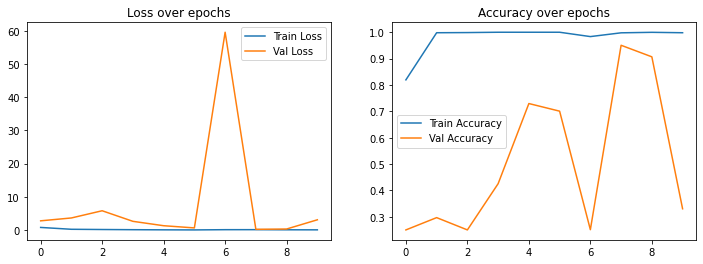


> Model successfully saved as pretext_models/pretext_model_qpm_real_cnn.h5
>>> FINISHED PRETEXT TASK
> folder: /mnt/c/Users/Siam/OneDrive - Tuskegee University/ai-arni-nsf/SAMPLE_dataset_public/png_images/qpm/real | cnn

>>> STARTED PRETEXT TASK
> folder: /mnt/c/Users/Siam/OneDrive - Tuskegee University/ai-arni-nsf/SAMPLE_dataset_public/png_images/qpm/real | resnet50
> pretext task training model: input_shape (128, 128, 1), num_classes 4, architecture_name resnet50
Model: "model_6"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 input_3 (InputLayer)                                 [(None, 128, 128, 1)]                           0                 
                                                                                                                        
 resizing (Resizing)        

KeyboardInterrupt: 

In [20]:
if __name__ == "__main__":
    set_random_seeds()

    run_experiments(
        data_dirs=data_dirs[:1],
        architecture_names=architecture_names,
        classifiers=classifiers
    )